# Random Forest Project Tutorial

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.metrics import mean_squared_error, r2_score

from pickle import dump

In [2]:
X_train = pd.read_csv('X_train_reduced.csv')
X_test = pd.read_csv('X_test_reduced.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

X_train.head()

Glucose   BMI  BloodPressure   Age
0     84.0   0.0            0.0  21.0
1    112.0  28.2           82.0  50.0
2    139.0  28.7           46.0  22.0
3    161.0  21.9           50.0  65.0
4    134.0  46.2           80.0  46.0

In [3]:
y_train.head()

has_diabetes
0             0
1             1
2             0
3             0
4             1

In [4]:
y_test.head()

has_diabetes
0             0
1             0
2             0
3             0
4             0

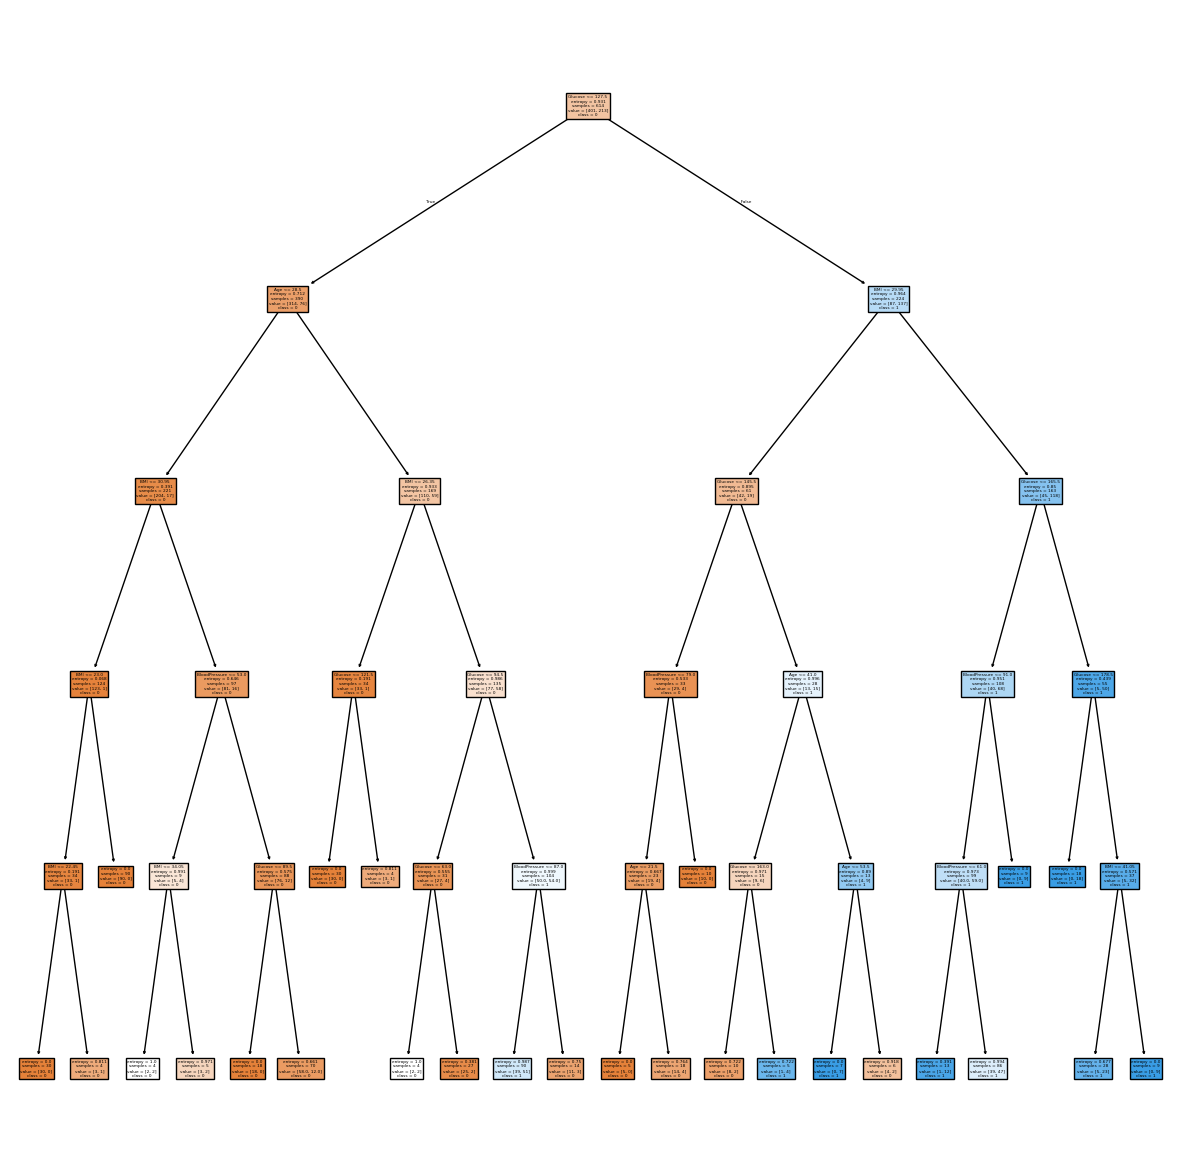


 
 Decision Tree Accuracy: 0.7142857142857143


In [5]:
# 10.A) Applying Decision Tree -again- to data set for Random Forest comparsion

# Training again the Decision Tree just with the selected features:

decision_tree_model = DecisionTreeClassifier(criterion =  "entropy", max_depth = 5, min_samples_leaf = 4, min_samples_split = 2, random_state=42)

decision_tree_model.fit(X_train, y_train)

# Visualize the tree

from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(decision_tree_model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

# Test the Decision Tree just with the selected features:
y_pred = decision_tree_model.predict(X_test)
y_pred


# Evaluate the Model Tree just with the selected features:

from sklearn.metrics import accuracy_score

decision_tree_accuracy = accuracy_score(y_test, y_pred)

print(f"\n \n Decision Tree Accuracy: {decision_tree_accuracy}")

dump(decision_tree_model, open("decision_tree_regressor_with_decision_tree_feature_selection_42.sav", "wb"))



In [6]:
# 10.B) Applying Random Forest Model 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

random_forest_model = RandomForestClassifier(random_state = 42)
random_forest_model.fit(X_train, y_train)

# Get predictions for test set
y_pred_test = random_forest_model.predict(X_test)

# Get predictions for training set to evaluate training performance
y_pred_train = random_forest_model.predict(X_train)  

# Evaluation:

print(f"\n \n Random Forest Accuracy (test): {accuracy_score(y_test, y_pred_test)}")
print(f"\n Random Forest Accuracy (train): {accuracy_score(y_train, y_pred_train)}") # Use y_pred_train here
print(f"\n \n Random Forest f1_score (test): {f1_score(y_test, y_pred_test, average='micro')}") # Use y_pred_test here, and y_test instead of X_test
print(f"\n Random Forest f1_score (train): {f1_score(y_train, y_pred_train, average='micro')}") # Use y_pred_train here, and y_train instead of X_train
print(f"\n \n Random Forest precision (test): {precision_score(y_test, y_pred_test, average='micro')}") # Use y_pred_test here
print(f"\n Random Forest precision (train): {precision_score(y_train, y_pred_train, average='micro')}") # Use y_pred_train here
print(f"\n \n Random Forest recall (test): {recall_score(y_test, y_pred_test, average='micro')}") # Use y_pred_test here
print(f"\n Random Forest recall (train): {recall_score(y_train, y_pred_train, average='micro')}") # Use y_pred_train here


/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



 
 Random Forest Accuracy (test): 0.7402597402597403

 Random Forest Accuracy (train): 1.0

 
 Random Forest f1_score (test): 0.7402597402597403

 Random Forest f1_score (train): 1.0

 
 Random Forest precision (test): 0.7402597402597403

 Random Forest precision (train): 1.0

 
 Random Forest recall (test): 0.7402597402597403

 Random Forest recall (train): 1.0


In [ ]:
# 11) Optimized Random Forest Model -  Manually


optimized_random_forest_model = RandomForestClassifier(n_estimators = 500, max_depth = 5, min_samples_split = 5,
                                             min_samples_leaf = 2, random_state = 42)
optimized_random_forest_model.fit(X_train, y_train)

# Get predictions for test set
random_forest_model_y_pred_test = optimized_random_forest_model.predict(X_test)

# Get predictions for training set to evaluate training performance
random_forest_model_y_pred_train = optimized_random_forest_model.predict(X_train)  

# Evaluation:

print(f"\n \n Optimized Random Forest Accuracy (test): {accuracy_score(y_test, random_forest_model_y_pred_test)}")
print(f"\n Optimized Random Forest Accuracy (train): {accuracy_score(y_train, random_forest_model_y_pred_train)}") 
print(f"\n \n Optimized Random Forest f1_score (test): {f1_score(y_test, random_forest_model_y_pred_test, average='micro')}") 
print(f"\n Optimized Random Forest f1_score (train): {f1_score(y_train, random_forest_model_y_pred_train, average='micro')}") 
print(f"\n \n Optimized Random Forest precision (test): {precision_score(y_test, random_forest_model_y_pred_test, average='micro')}")
print(f"\n Optimized Random Forest precision (train): {precision_score(y_train, random_forest_model_y_pred_train, average='micro')}") 
print(f"\n \n Optimized Random Forest recall (test): {recall_score(y_test, random_forest_model_y_pred_test, average='micro')}") 
print(f"\n Optimized Random Forest recall (train): {recall_score(y_train, random_forest_model_y_pred_train, average='micro')}")

from pickle import dump

dump(optimized_random_forest_model , open("optimized_random_forest_model_5000estimators_max_depth5_min_samples_split5_min_samples_leaf2_42.sav", "wb"))



/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



 
 Optimized Random Forest Accuracy (test): 0.7727272727272727

 Optimized Random Forest Accuracy (train): 0.8403908794788274

 
 Optimized Random Forest f1_score (test): 0.7727272727272727

 Optimized Random Forest f1_score (train): 0.8403908794788274

 
 Optimized Random Forest precision (test): 0.7727272727272727

 Optimized Random Forest precision (train): 0.8403908794788274

 
 Optimized Random Forest recall (test): 0.7727272727272727

 Optimized Random Forest recall (train): 0.8403908794788274
